# Import libraries

In [ ]:
# Import libraries
from google.colab import drive
import pandas as pd
import numpy as np
import os

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

import seaborn as sns
import matplotlib.pyplot as plt

# Load data from Google Drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Read multiple CSV files
demo_data = pd.read_csv('/content/drive/My Drive/IE6400/Project/Datasets/DEMO_DATA.csv', sep ='\t')
albumin = pd.read_csv('/content/drive/My Drive/IE6400/Project/Datasets/ALBUMIN.csv', sep ='\t')
bicarbonate = pd.read_csv('/content/drive/My Drive/IE6400/Project/Datasets/BICARBONATE.csv', sep ='\t')
blood_glucose = pd.read_csv('/content/drive/My Drive/IE6400/Project/Datasets/BLOOD_GLUCOSE.csv', sep = '\t')
blood_urea_nitrogen = pd.read_csv('/content/drive/My Drive/IE6400/Project/Datasets/BLOOD_UREA_NITROGEN.csv', sep ='\t')
creatinine = pd.read_csv('/content/drive/My Drive/IE6400/Project/Datasets/CREATININE.csv', sep ='\t')
hematrocrit = pd.read_csv('/content/drive/My Drive/IE6400/Project/Datasets/HEMATROCRIT.csv', sep ='\t')
platelet_count = pd.read_csv('/content/drive/My Drive/IE6400/Project/Datasets/PLATELET_COUNT.csv', sep ='\t')
potasssium = pd.read_csv('/content/drive/My Drive/IE6400/Project/Datasets/POTASSSIUM.csv', sep ='\t')
sodium = pd.read_csv('/content/drive/My Drive/IE6400/Project/Datasets/SODIUM.csv', sep ='\t')
white_blood_cells = pd.read_csv('/content/drive/My Drive/IE6400/Project/Datasets/WHITE_BLOOD_CELLS.csv', sep ='\t')
art_ph = pd.read_csv('/content/drive/My Drive/IE6400/Project/Datasets/ART_PH.csv', sep ='\t')
cvp = pd.read_csv('/content/drive/My Drive/IE6400/Project/Datasets/CVP.csv', sep ='\t')
dias_press = pd.read_csv('/content/drive/My Drive/IE6400/Project/Datasets/DIAS_PRESS.csv', sep ='\t')
hr = pd.read_csv('/content/drive/My Drive/IE6400/Project/Datasets/HR.csv', sep ='\t')
resp_rate = pd.read_csv('/content/drive/My Drive/IE6400/Project/Datasets/RESP_RATE.csv', sep ='\t')
spo2 = pd.read_csv('/content/drive/My Drive/IE6400/Project/Datasets/SPO2.csv', sep ='\t')
sys_press = pd.read_csv('/content/drive/My Drive/IE6400/Project/Datasets/SYS_PRESS.csv', sep ='\t')
temp = pd.read_csv('/content/drive/My Drive/IE6400/Project/Datasets/TEMP.csv', sep ='\t')

Mounted at /content/drive


In [ ]:
# Putting all dataframes in a list
dfs = [demo_data, albumin, bicarbonate, blood_glucose, blood_urea_nitrogen, creatinine, hematrocrit, platelet_count, potasssium,
      sodium, white_blood_cells, art_ph, cvp, dias_press, hr, resp_rate, spo2, sys_press, temp]

# Dropping the 'Unnamed: 0' column
for df in dfs:
    df.drop(columns= ["Unnamed: 0"], inplace = True)

In [ ]:
# Joining dataframes using 'OUTER JOIN' on 'hadm_id'
main_df = dfs[0]

for df in dfs[1:]:
    main_df = pd.merge(main_df, df, how = 'outer', on = 'hadm_id')

In [ ]:
main_df.describe()

hadm_id           age   avg_albumin   std_albumin  \
count   58976.000000  58976.000000  30997.000000  16270.000000   
mean   149970.809584     55.189864      3.180735      0.322306   
std     28883.095213     27.316531      0.661687      0.236162   
min    100001.000000      0.000000      1.000000      0.000000   
25%    124952.750000     43.518463      2.700000      0.148324   
50%    149989.500000     61.800390      3.200000      0.282843   
75%    174966.500000     75.938302      3.650000      0.427200   
max    199999.000000     91.400000      5.700000      2.050610   

       avg_bicarbonate  std_bicarbonate  avg_blood_glucose  std_blood_glucose  \
count     52826.000000     50574.000000       50654.000000       49489.000000   
mean         25.158719         2.686865         133.275120          38.132105   
std           3.925426         1.322920          41.024532          38.531466   
min           6.000000         0.000000          11.000000           0.000000   
25%          23.000000         1.760682         109.669118          18.256949   
50%          25.230769         2.507133         124.222222          27.792677   
75%          27.250000         3.393206         144.872917          43.915300   
max          52.000000        19.091883         798.000000         760.331429   

       avg_blood_urea_nitrogen  std_blood_urea_nitrogen  ...         avg_hr  \
count             51009.000000             49600.000000  ...   56714.000000   
mean                 25.134120                 6.638206  ...      94.349520   
std                  18.272785                 6.666240  ...     433.576862   
min                   1.421053                 0.000000  ...       0.000000   
25%                  13.333333                 2.644111  ...      76.620172   
50%                  19.200000                 4.392002  ...      86.811066   
75%                  30.615385                 8.022962  ...     100.142857   
max                 232.040000               105.561763  ...  103185.154639   

             std_hr  avg_resp_rate  std_resp_rate      avg_spo2  \
count  5.484700e+04   56669.000000   54749.000000  49001.000000   
mean   2.916722e+01      23.304075       8.620684     98.219337   
std    4.335477e+03      73.564236     863.227782    225.469976   
min    0.000000e+00       0.000000       0.000000      0.000000   
25%    6.992576e+00      16.857143       3.160570     96.031250   
50%    9.698849e+00      19.348837       4.093154     97.190476   
75%    1.293145e+01      23.056075       5.585988     98.200000   
max    1.015337e+06   17340.522059  201985.424363  48397.260870   

            std_spo2  avg_sys_press  std_sys_press     avg_temp     std_temp  
count   48958.000000   49035.000000   49016.000000  5987.000000  5649.000000  
mean       18.014138     120.765523      17.911410    35.143491     0.657427  
std      2191.046335      28.061710     164.456130     8.247789     0.751722  
min         0.000000       0.000000       0.000000     0.000000     0.000000  
25%         1.541687     108.914791      11.609195    36.703452     0.406940  
50%         2.017443     118.818182      14.973800    37.061364     0.575270  
75%         2.616786     130.893797      19.156357    37.400000     0.767901  
max    401275.132540    3122.468936   20570.481318    40.564864    26.587214  

[8 rows x 38 columns]

In [ ]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58977 entries, 0 to 58976
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hadm_id                  58976 non-null  float64
 1   age                      58976 non-null  float64
 2   gender                   58976 non-null  object 
 3   marital_status           58976 non-null  object 
 4   religion                 58976 non-null  object 
 5   ethnicity                58976 non-null  object 
 6   avg_albumin              30997 non-null  float64
 7   std_albumin              16270 non-null  float64
 8   avg_bicarbonate          52826 non-null  float64
 9   std_bicarbonate          50574 non-null  float64
 10  avg_blood_glucose        50654 non-null  float64
 11  std_blood_glucose        49489 non-null  float64
 12  avg_blood_urea_nitrogen  51009 non-null  float64
 13  std_blood_urea_nitrogen  49600 non-null  float64
 14  avg_creatinine        

# Data Pre-processing

In [ ]:
# Sum of null values in each column
main_df.isna().sum()

hadm_id                        1
age                            1
gender                         1
marital_status                 1
religion                       1
ethnicity                      1
avg_albumin                27980
std_albumin                42707
avg_bicarbonate             6151
std_bicarbonate             8403
avg_blood_glucose           8323
std_blood_glucose           9488
avg_blood_urea_nitrogen     7968
std_blood_urea_nitrogen     9377
avg_creatinine              7980
std_creatinine              9375
avg_hematrocrit             1874
std_hematrocrit             8035
avg_platelet_count          2002
std_platelet_count          8449
avg_potasssium              6100
std_potasssium              8263
avg_sodium                  6117
std_sodium                  8366
avg_white_blood_cells       1986
std_white_blood_cells       8566
avg_art_ph                 40914
std_art_ph                 43947
avg_cvp                    40551
std_cvp                    40710
avg_dias_press              9942
std_dias_press              9961
avg_hr                      2263
std_hr                      4130
avg_resp_rate               2308
std_resp_rate               4228
avg_spo2                    9976
std_spo2                   10019
avg_sys_press               9942
std_sys_press               9961
avg_temp                   52990
std_temp                   53328
dtype: int64

Total Rows : 58977

Total Columns : 42

Dropping the columns where more than 25,000 (~42%) values are missing.

Columns to be dropped: 'std_temp', 'avg_temp', 'avg_art_ph', 'std_art_ph', 'avg_cvp', 'std_cvp', 'std_albumin', 'avg_albumin'

In [ ]:
# Dropping these columns as more than 67% of data is missing
main_df.drop(labels= ['std_temp', 'avg_temp', 'avg_art_ph', 'std_art_ph', 'avg_cvp', 'std_cvp', 'std_albumin', 'avg_albumin'], axis = 1, inplace= True)

## Dropping rows

Dropping rows which have any features missing after dropping columns. As this is a medical data, it can cause biases imputing the data. This can create possible miss clustering causing high negative impact socially. To avoid any mis-clustering, I'm removing these rows.

Text(0, 0.5, 'Number of patients')

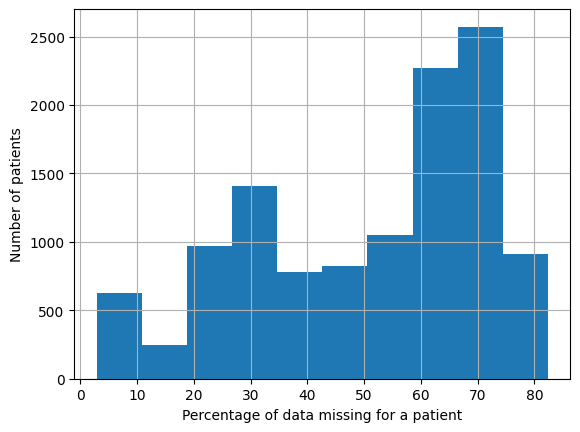

In [ ]:
bin_df = main_df.isna().sum(axis=1)/main_df.shape[1]

bins = (bin_df[bin_df>0]*100).hist(bins=10)
plt.xlabel("Percentage of data missing for a patient")
plt.ylabel("Number of patients")

In [ ]:
bin_df[bin_df > 0].shape

(11649,)

In [ ]:
# Sum of null values in each column
row_to_drop = np.where((main_df.isna().sum(axis=1)/main_df.shape[1] > 0) == True)
main_df.drop(list(row_to_drop[0]), axis=0, inplace=True)

In [ ]:
main_df.shape

(47328, 34)

## Drop any rows with missing hadm_id

ID is our primary key, hence required for any analysis.

In [ ]:
# Storing the null hadm_id in index drop
index_drop = main_df[main_df.hadm_id.isna()].index

In [ ]:
# Dropping the null hadm_id
main_df.drop(index = index_drop, inplace = True)

In [ ]:
# Checking the total number of null values in every column
main_df.isna().sum()

hadm_id                    0
age                        0
gender                     0
marital_status             0
religion                   0
ethnicity                  0
avg_bicarbonate            0
std_bicarbonate            0
avg_blood_glucose          0
std_blood_glucose          0
avg_blood_urea_nitrogen    0
std_blood_urea_nitrogen    0
avg_creatinine             0
std_creatinine             0
avg_hematrocrit            0
std_hematrocrit            0
avg_platelet_count         0
std_platelet_count         0
avg_potasssium             0
std_potasssium             0
avg_sodium                 0
std_sodium                 0
avg_white_blood_cells      0
std_white_blood_cells      0
avg_dias_press             0
std_dias_press             0
avg_hr                     0
std_hr                     0
avg_resp_rate              0
std_resp_rate              0
avg_spo2                   0
std_spo2                   0
avg_sys_press              0
std_sys_press              0
dtype: int64

##  Categorical features

Performing one hot encoding

In [ ]:
# Making a List of categorical values present in the dataframe
categorical_values = ['gender', 'marital_status', 'religion', 'ethnicity']

In [ ]:
# Making a dataframe for categorical values separately
categorical_df = main_df[categorical_values + ['hadm_id'] ]

In [ ]:
categorical_df

gender      marital_status       religion ethnicity   hadm_id
0          F  DIVORCED/SEPARATED      CHRISTIAN     WHITE  100001.0
1          M              SINGLE           NONE     WHITE  100003.0
2          F              SINGLE           NONE     BLACK  100006.0
3          F             MARRIED  JEWISH/HEBREW     WHITE  100007.0
4          M             MARRIED      CHRISTIAN     WHITE  100009.0
...      ...                 ...            ...       ...       ...
58971      M  DIVORCED/SEPARATED      CHRISTIAN      NONE  199993.0
58972      F              SINGLE      CHRISTIAN     WHITE  199994.0
58973      M              SINGLE      CHRISTIAN     WHITE  199995.0
58974      M             MARRIED      CHRISTIAN     WHITE  199998.0
58975      M             MARRIED  JEWISH/HEBREW     WHITE  199999.0

[47328 rows x 5 columns]

In [ ]:
# Dropping Categorical values
main_df.drop(categorical_values, axis = 1, inplace= True)

In [ ]:
# Checking the number of unique values in every column
categorical_df.nunique()

gender                2
marital_status        5
religion              6
ethnicity             6
hadm_id           47328
dtype: int64

In [ ]:
# One hot encoding on the categorical Dataframe
categorical_one_hot = pd.get_dummies(categorical_df, columns= categorical_values)


# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# categorical_one_hot = categorical_df[categorical_values].apply(encoder.fit_transform)
# categorical_one_hot["hadm_id"] = categorical_df["hadm_id"]

In [ ]:
categorical_one_hot

hadm_id  gender_F  gender_M  marital_status_DIVORCED/SEPARATED  \
0      100001.0      True     False                               True   
1      100003.0     False      True                              False   
2      100006.0      True     False                              False   
3      100007.0      True     False                              False   
4      100009.0     False      True                              False   
...         ...       ...       ...                                ...   
58971  199993.0     False      True                               True   
58972  199994.0      True     False                              False   
58973  199995.0     False      True                              False   
58974  199998.0     False      True                              False   
58975  199999.0     False      True                              False   

       marital_status_MARRIED  marital_status_SINGLE  marital_status_UNKNOWN  \
0                       False                  False                   False   
1                       False                   True                   False   
2                       False                   True                   False   
3                        True                  False                   False   
4                        True                  False                   False   
...                       ...                    ...                     ...   
58971                   False                  False                   False   
58972                   False                   True                   False   
58973                   False                   True                   False   
58974                    True                  False                   False   
58975                    True                  False                   False   

       marital_status_WIDOWED  religion_BUDDHIST/HINDU  religion_CHRISTIAN  \
0                       False                    False                True   
1                       False                    False               False   
2                       False                    False               False   
3                       False                    False               False   
4                       False                    False                True   
...                       ...                      ...                 ...   
58971                   False                    False                True   
58972                   False                    False                True   
58973                   False                    False                True   
58974                   False                    False                True   
58975                   False                    False               False   

       religion_JEWISH/HEBREW  religion_MUSLIM  religion_NONE  \
0                       False            False          False   
1                       False            False           True   
2                       False            False           True   
3                        True            False          False   
4                       False            False          False   
...                       ...              ...            ...   
58971                   False            False          False   
58972                   False            False          False   
58973                   False            False          False   
58974                   False            False          False   
58975                    True            False          False   

       religion_ORTHODOX  ethnicity_ASIAN  ethnicity_BLACK  \
0                  False            False            False   
1                  False            False            False   
2                  False            False             True   
3                  False            False            False   
4                  False            False            False   
...                  ...              ...              ...   
58971 

## Scaling the numerical features

In [ ]:
# Making a copy of the original dataframe
scaled_df = main_df.copy()

In [ ]:
# # Applying min-max scaling
for col in scaled_df.columns[1:]:
    scaled_df[col] = (scaled_df[col] - scaled_df[col].min())/ (scaled_df[col].max() - scaled_df[col].min())

scaled_df

# from sklearn.preprocessing import StandardScaler
# scaled_df_standard = StandardScaler().fit_transform(scaled_df)
# scaled_df = pd.DataFrame(scaled_df_standard, index=scaled_df.index, columns=scaled_df.columns)

hadm_id       age  avg_bicarbonate  std_bicarbonate  \
0      100001.0  0.267724         0.288265         0.272060   
1      100003.0  0.588045         0.287202         0.256056   
2      100006.0  0.443912         0.504121         0.256511   
3      100007.0  0.770386         0.403770         0.117851   
4      100009.0  0.599638         0.410714         0.123650   
...         ...       ...              ...              ...   
58971  199993.0  0.596052         0.412408         0.156422   
58972  199994.0  0.566803         0.352307         0.192766   
58973  199995.0  0.112473         0.463068         0.153105   
58974  199998.0  0.709282         0.380208         0.137370   
58975  199999.0  0.960198         0.392299         0.191118   

       avg_blood_glucose  std_blood_glucose  avg_blood_urea_nitrogen  \
0               0.189953           0.105529                 0.117728   
1               0.094095           0.035246                 0.143436   
2               0.105507           0.044163                 0.067886   
3               0.124140           0.037811                 0.055508   
4               0.171516           0.056156                 0.067553   
...                  ...                ...                      ...   
58971           0.130423           0.037217                 0.099102   
58972           0.116257           0.027486                 0.095015   
58973           0.116454           0.031275                 0.052066   
58974           0.140044           0.038805                 0.071166   
58975           0.126294           0.030388                 0.065927   

       std_blood_urea_nitrogen  avg_creatinine  std_creatinine  ...  \
0                     0.112070        0.010618        0.000545  ...   
1                     0.152249        0.005195        0.000368  ...   
2                     0.030565        0.003061        0.000192  ...   
3                     0.030615        0.003197        0.000217  ...   
4                     0.034418        0.003756        0.000102  ...   
...                        ...             ...             ...  ...   
58971                 0.090471        0.005093        0.000511  ...   
58972                 0.066537        0.014505        0.001408  ...   
58973                 0.028228        0.003185        0.000186  ...   
58974                 0.038089        0.004475        0.000466  ...   
58975                 0.028616        0.004615        0.000534  ...   

       avg_dias_press  std_dias_press    avg_hr    std_hr  avg_resp_rate  \
0            0.031715        0.000824  0.000789  0.000012       0.000613   
1            0.018009        0.000971  0.000497  0.000008       0.000524   
2            0.027194        0.000991  0.000763  0.000010       0.000687   
3            0.020800        0.000899  0.000480  0.000011       0.000718   
4            0.013987        0.000485  0.000379  0.000012       0.000968   
...               ...             ...       ...       ...            ...   
58971        0.020273        0.000929  0.000555  0.000011       0.000691   
58972        0.013931        0.000934  0.000407  0.000007       0.000419   
58973        0.019098        0.000685  0.000758  0.000007       0.000701   
58974        0.013912        0.000620  0.000401  0.000007       0.000536   
58975        0.015904        0.001098  0.000421  0.000007       0.001096   

       std_resp_rate  avg_spo2  std_spo2  avg_sys_press  std_sys_press  
0           0.000013  0.001122  0.000002       0.045176       0.001045  
1           0.000014  0.001135  0.000007       0.026499       0.000829  
2           0.000016  0.001128  0.000006       0.034268       0.000631  
3           0.000022  0.001130  0.000005       0.034345       0.000598  
4           0.000032  0.001093  0.000005       0.024563       0.000615  
...              ...       ...       ...            ...            ...  
58971       0.000024  0.001100  0.000005       0.023348       0.000713  
58972       0.000020  0.001109  0.00

In [ ]:
# Updating main dataframe by merging min-max scaled df and one hot encoded dataframe
main_df = scaled_df.merge(categorical_one_hot, on = 'hadm_id', how = 'outer')

In [ ]:
# Feature column list to train the model in kmeans
feature_columns = main_df.columns.to_list()
feature_columns.remove("hadm_id")

# K-means clutering - Finding optimal K

In [ ]:
# K-Means Clustering
sse = []
sc = []
ch = []
num_clusters = 100

for k in range(2, num_clusters+1):
    km = KMeans(n_clusters= k)
    labels = km.fit_predict(main_df[feature_columns])

    sil_score = silhouette_score(main_df[feature_columns],labels)
    sc.append(sil_score)

    ch_score = calinski_harabasz_score(main_df[feature_columns], labels)
    ch.append(ch_score)

    sse.append(km.inertia_)
    print(k,end = '\r')

## Plots

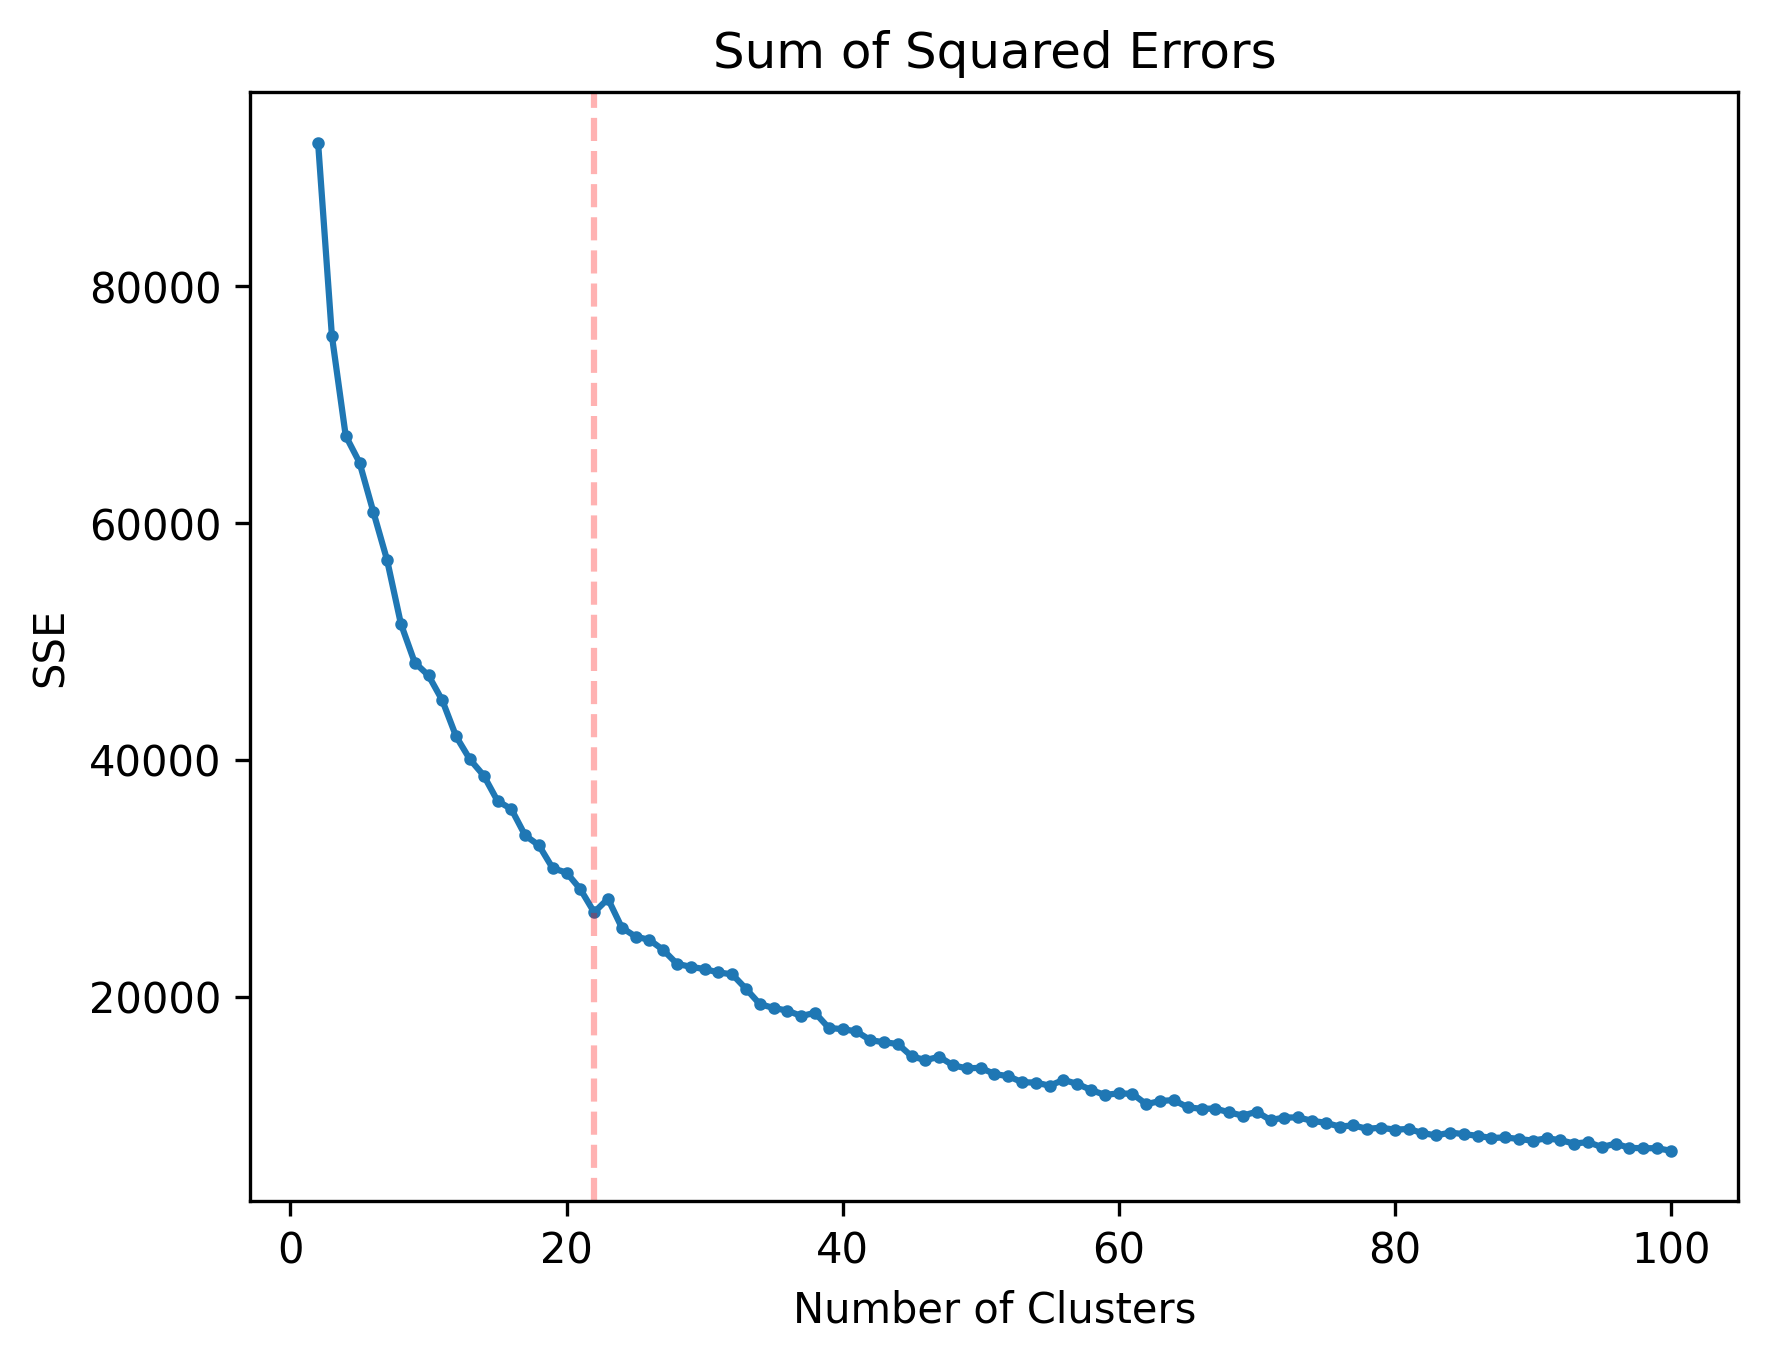

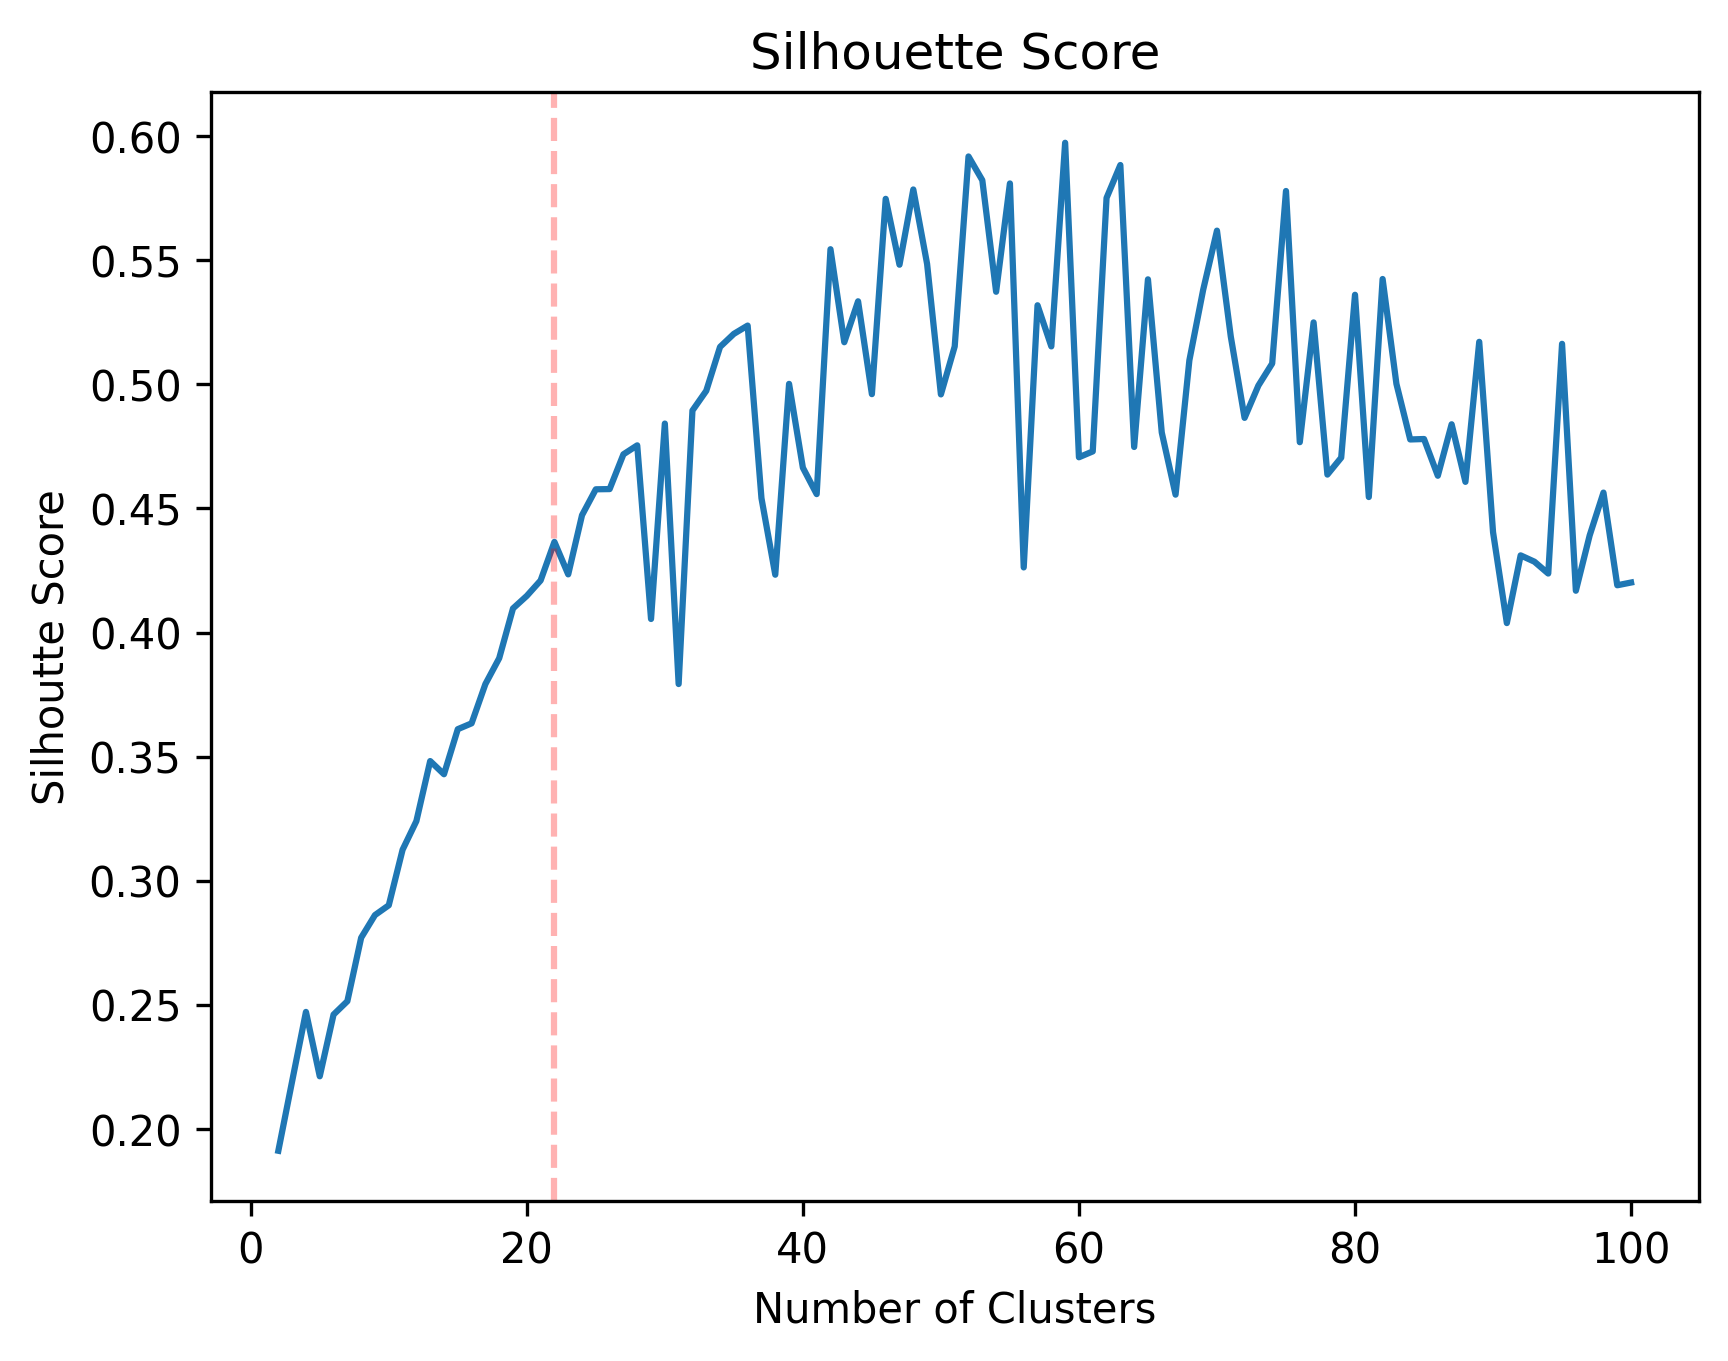

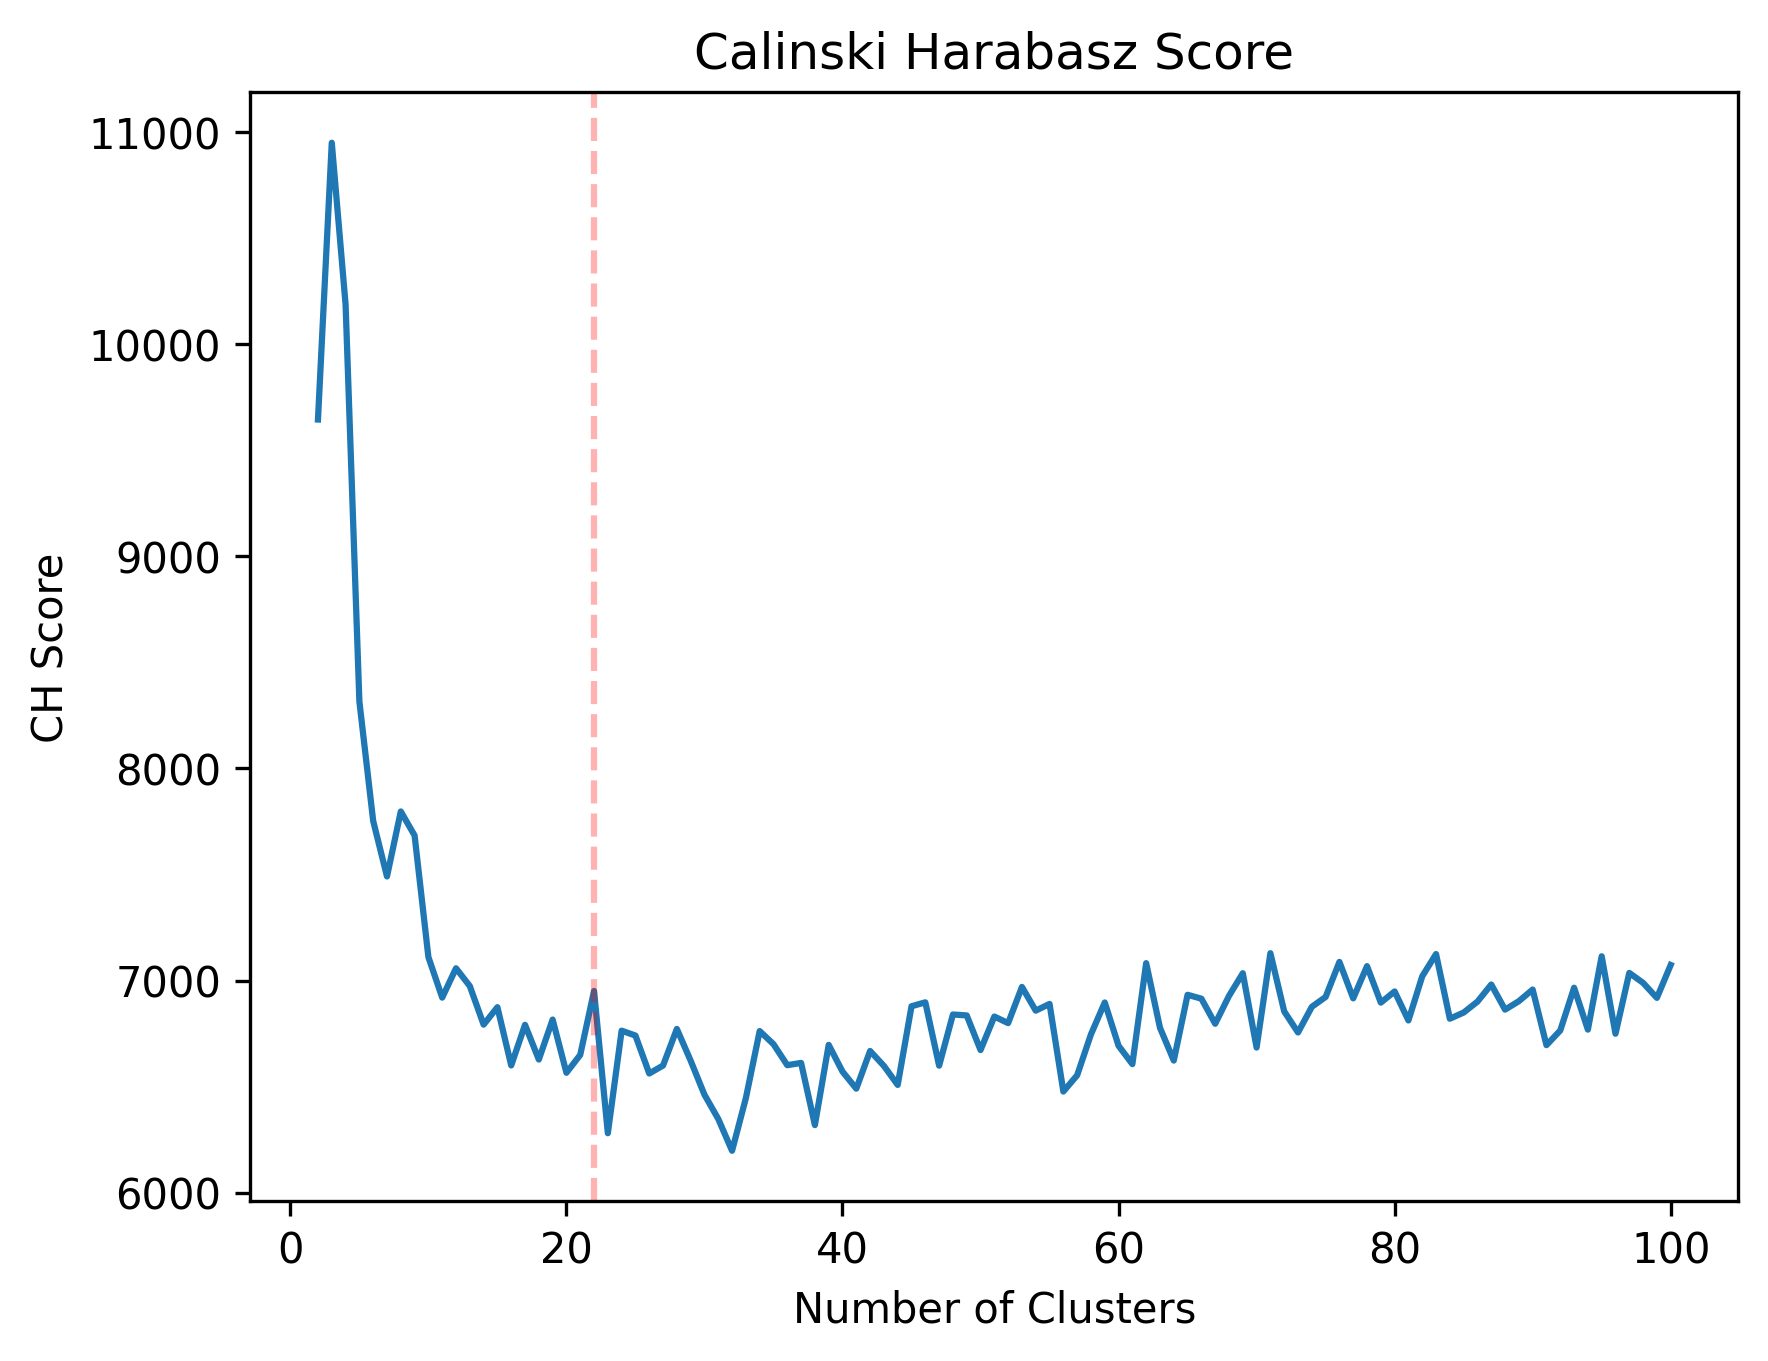

In [ ]:
optimal_cluster_num = 22

plt.figure(dpi= 300)
plt.plot(range(2, num_clusters+1), sse, linestyle="-", marker="o", markersize=2)
plt.axvline(x=optimal_cluster_num, color='r', linestyle='--', alpha=0.3, label="Vertical Line")
plt.title("Sum of Squared Errors")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.savefig("SSE.jpeg")

plt.figure(dpi= 300)
plt.plot(range(2, num_clusters+1), sc)
plt.axvline(x=optimal_cluster_num, color='r', linestyle='--', alpha=0.3, label="Vertical Line")
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Score")
plt.savefig("SS.jpeg")

plt.figure(dpi= 300)
plt.plot(range(2, num_clusters+1), ch)
plt.axvline(x=optimal_cluster_num, color='r', linestyle='--', alpha=0.3, label="Vertical Line")
plt.title("Calinski Harabasz Score")
plt.xlabel("Number of Clusters")
plt.ylabel("CH Score")
plt.savefig("CH.jpeg")

# Training with optimal cluster

In [ ]:
km = KMeans(n_clusters= optimal_cluster_num)
labels = km.fit_predict(main_df[feature_columns])
optimal_sil_score = silhouette_score(main_df[feature_columns],labels)
optimal_ch_score = calinski_harabasz_score(main_df[feature_columns], labels)
optimal_sse = km.inertia_

print(len(labels))
print(optimal_sil_score)
print(optimal_ch_score)
print(optimal_sse)

47328
0.4258261246634269
6660.889996304277
28014.776722518025


In [ ]:
main_df["labels"] = labels

In [ ]:
df_sampled = main_df.groupby("labels").sample(n=10, random_state=42)
selected_columns = ['age', 'avg_albumin', 'labels',
                    'avg_blood_glucose', 'std_blood_glucose', 'avg_blood_urea_nitrogen',
                    'std_blood_urea_nitrogen', 'avg_creatinine', 'std_creatinine',
                    'avg_hematrocrit', 'std_hematrocrit', 'avg_platelet_count',
                    'std_platelet_count', 'avg_potasssium', 'std_potasssium', 'avg_sodium',
                    'std_sodium', 'avg_white_blood_cells', 'std_white_blood_cells',
                    'avg_dias_press', 'std_dias_press', 'avg_hr', 'std_hr', 'avg_resp_rate',
                    'std_resp_rate', 'avg_spo2', 'std_spo2', 'avg_sys_press','gender',
                    'marital_status', 'religion', 'ethnicity', 'marital_status_SINGLE']

In [ ]:
df_sampled = main_df.merge(demo_data, on="hadm_id", how="left")
df_sampled.drop("age_x", inplace=True, axis=1)
df_sampled.rename(columns={"age_y": "age"}, inplace=True)

# Analysis

In [ ]:
import os
os.makedirs(f"kmeans/{optimal_cluster_num}")

for col in df_sampled.columns:
    plt.figure(figsize=(18, 6), dpi=300)
    sns.violinplot(x=df_sampled["labels"], y=df_sampled[col])
    plt.title(f"Distribution of {col} in each cluster")
    plt.savefig(f"kmeans/{optimal_cluster_num}/{col.replace('/', '_')}.jpeg")
    plt.close()

In [ ]:
df_sampled.columns

Index(['hadm_id', 'avg_bicarbonate', 'std_bicarbonate', 'avg_blood_glucose',
       'std_blood_glucose', 'avg_blood_urea_nitrogen',
       'std_blood_urea_nitrogen', 'avg_creatinine', 'std_creatinine',
       'avg_hematrocrit', 'std_hematrocrit', 'avg_platelet_count',
       'std_platelet_count', 'avg_potasssium', 'std_potasssium', 'avg_sodium',
       'std_sodium', 'avg_white_blood_cells', 'std_white_blood_cells',
       'avg_dias_press', 'std_dias_press', 'avg_hr', 'std_hr', 'avg_resp_rate',
       'std_resp_rate', 'avg_spo2', 'std_spo2', 'avg_sys_press',
       'std_sys_press', 'gender_F', 'gender_M',
       'marital_status_DIVORCED/SEPARATED', 'marital_status_MARRIED',
       'marital_status_SINGLE', 'marital_status_UNKNOWN',
       'marital_status_WIDOWED', 'religion_BUDDHIST/HINDU',
       'religion_CHRISTIAN', 'religion_JEWISH/HEBREW', 'religion_MUSLIM',
       'religion_NONE', 'religion_ORTHODOX', 'ethnicity_ASIAN',
       'ethnicity_BLACK', 'ethnicity_HISPANIC', 'ethnicity_NON

In [ ]:
plot_df = df_sampled[df_sampled.labels.isin([8, 9])]

In [ ]:
np.savez("kmeans_labels.npz", labels=main_df.labels.to_list())

<Axes: xlabel='labels', ylabel='avg_white_blood_cells'>

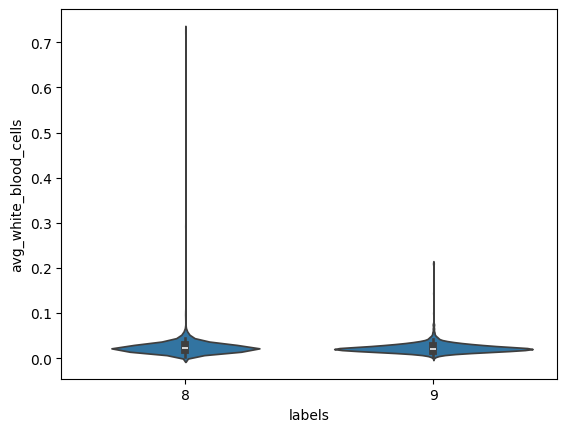

In [ ]:
sns.violinplot(x=plot_df["labels"], y=plot_df["avg_white_blood_cells"])


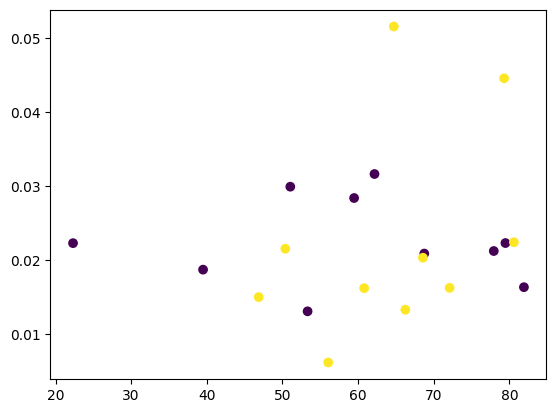

In [ ]:
plt.scatter(plot_df[""], plot_df["avg_white_blood_cells"], c=plot_df["labels"])

In [ ]:
df_sampled.groupby("ethnicity").labels.value_counts()

ethnicity  labels
ASIAN      9          441
           5          159
           21         100
           11          83
           2           79
                     ... 
WHITE      8         1159
           14         938
           20         849
           16         739
           10         350
Name: count, Length: 89, dtype: int64

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=50)
tsne_features = tsne.fit_transform(main_df[feature_columns])

Text(0.5, 1.0, 'Visualizing data with TSNE\nMethod: kmeans, n_clusters: 22')

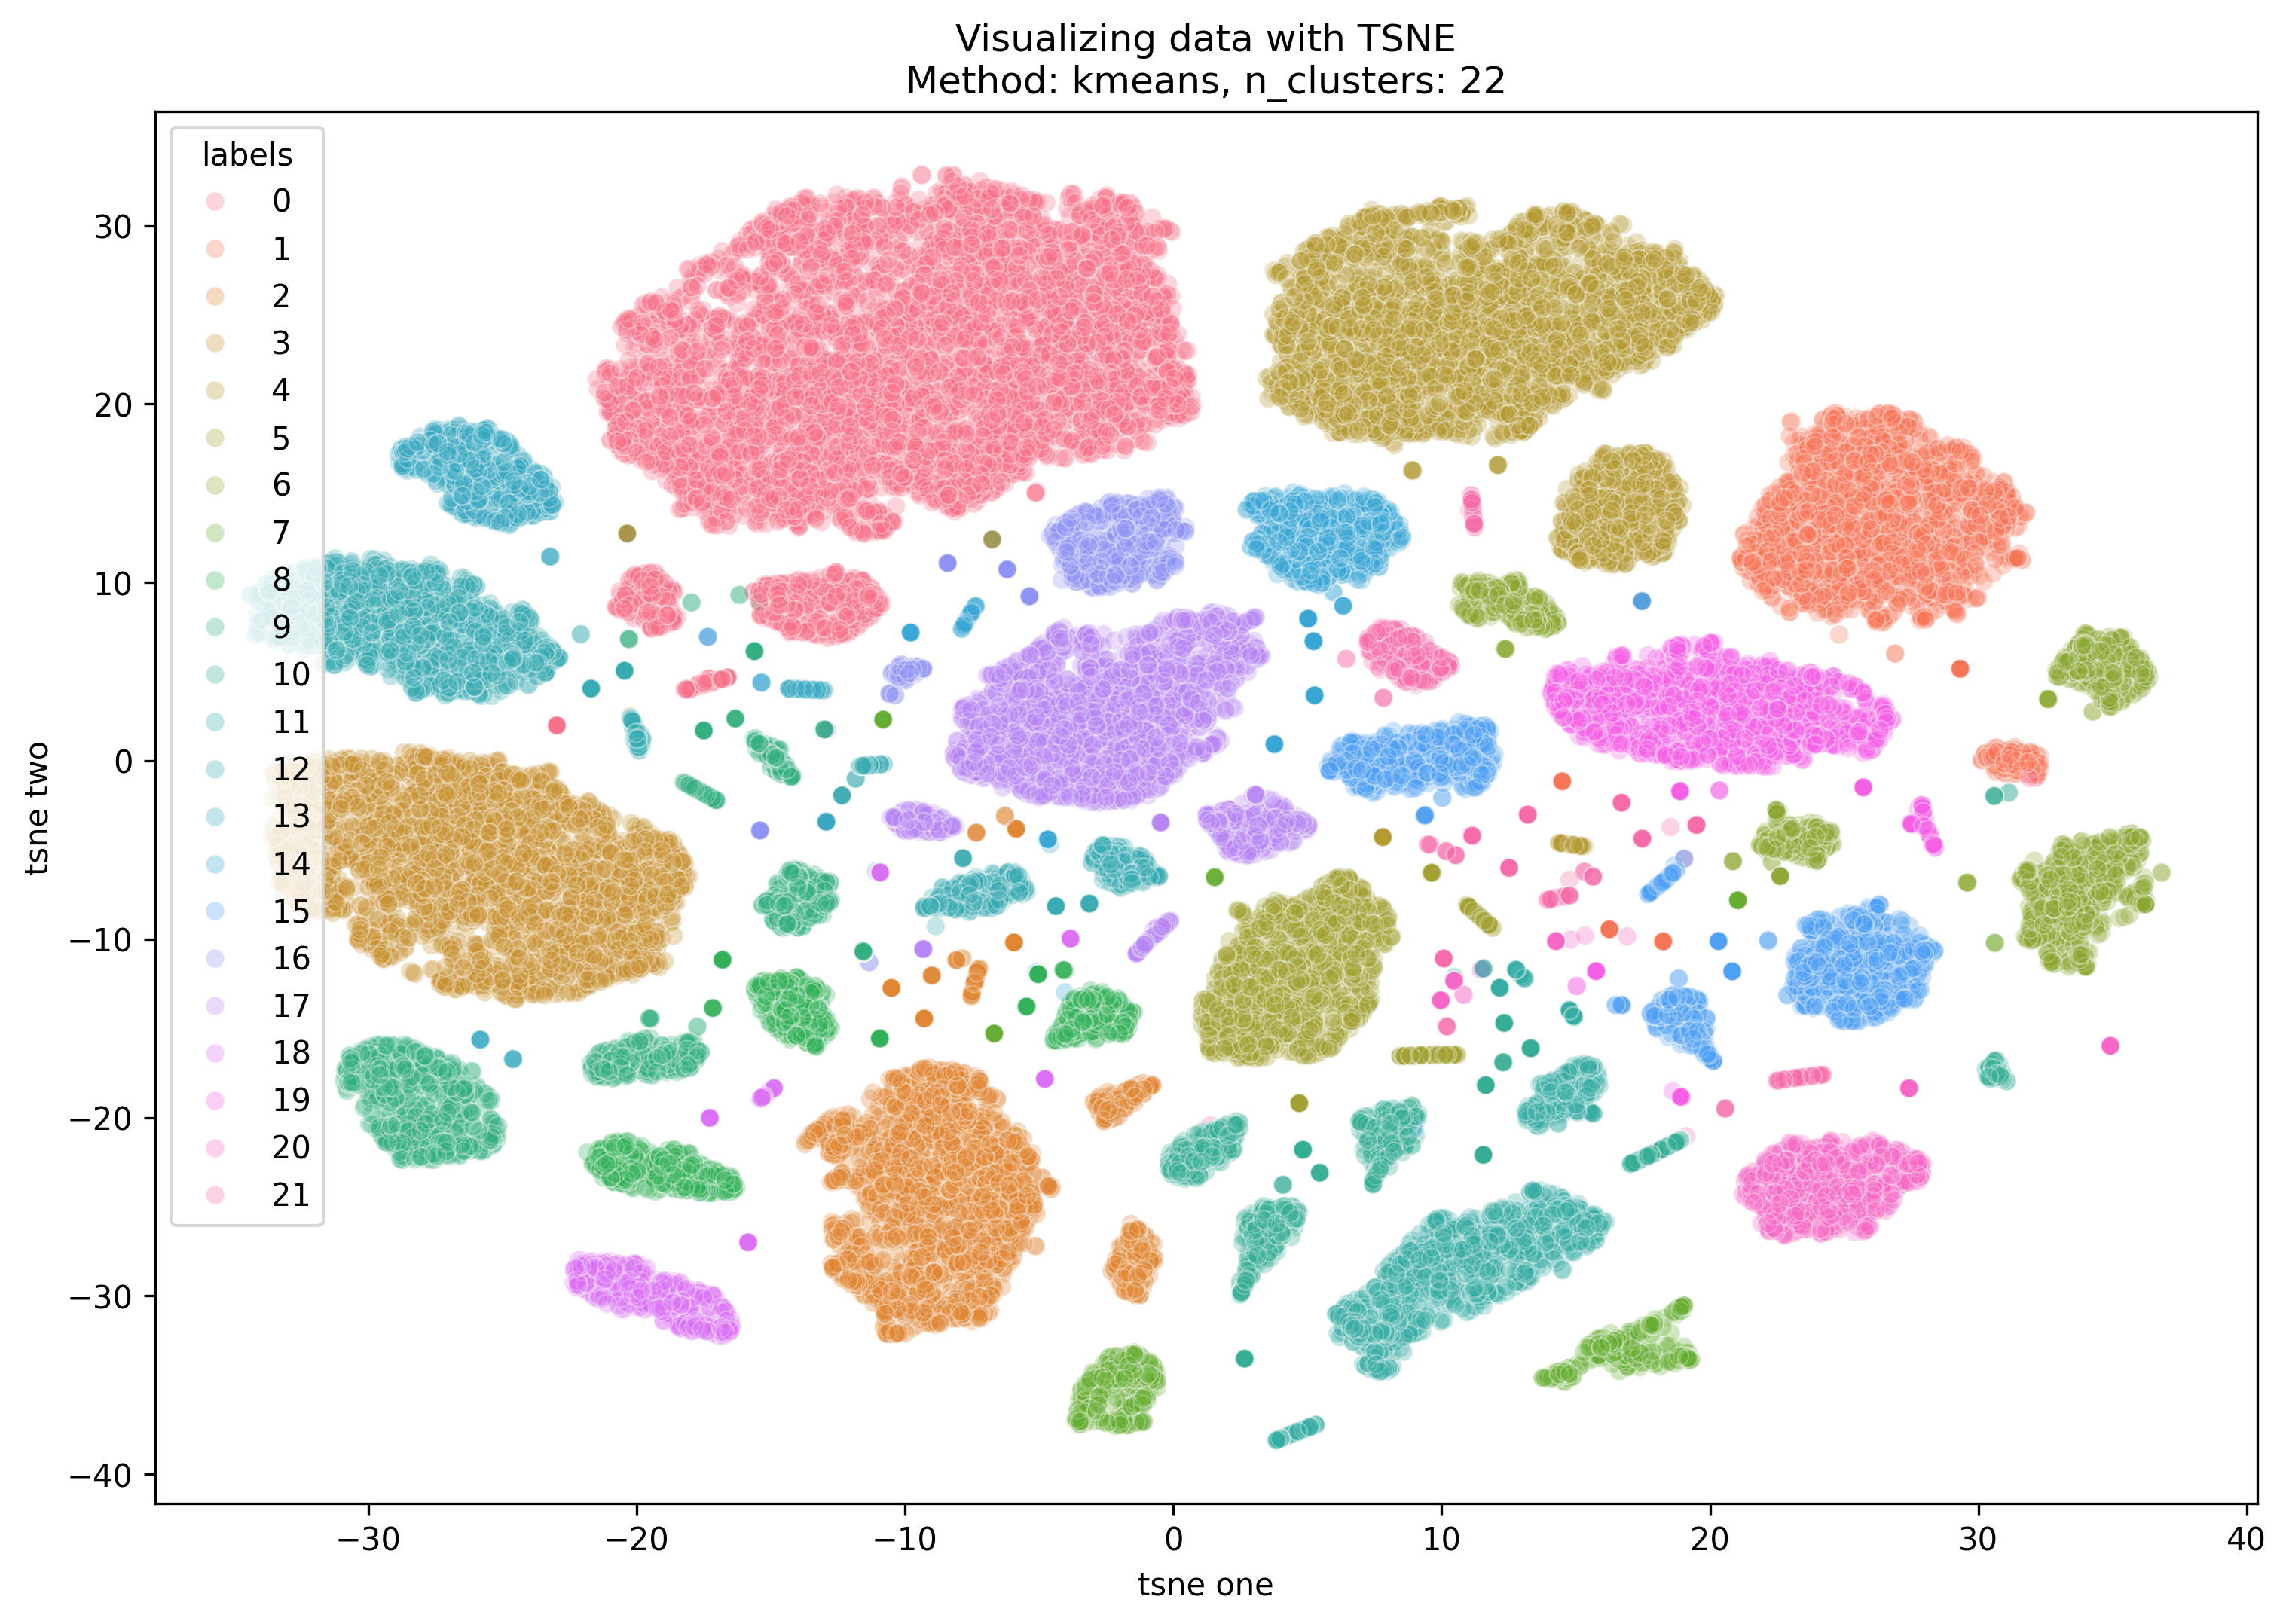

In [ ]:
df_tsne = pd.DataFrame()
df_tsne['tsne one'] = tsne_features[:,0]
df_tsne['tsne two'] = tsne_features[:,1]
df_tsne["labels"] = df_sampled["labels"]

plt.figure(figsize=(12,8), dpi=300)

sns.scatterplot(
    x="tsne one", y="tsne two",
    hue="labels",
    data=df_tsne,
    alpha=0.3,
    palette= sns.color_palette("husl", n_colors=df_tsne.labels.nunique())
)

plt.title(f"Visualizing data with TSNE\nMethod: kmeans, n_clusters: 22")
# plt.savefig(f"TSNE_no_impute_one_hot_kmeans_22.jpeg")

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_features = pca.fit_transform(main_df[feature_columns])

df_pca = pd.DataFrame()
df_pca['pca one'] = pca_features[:,0]
df_pca['pca two'] = pca_features[:,1]
df_pca['pca three'] = pca_features[:,2]
df_pca['labels'] = df_sampled["labels"]

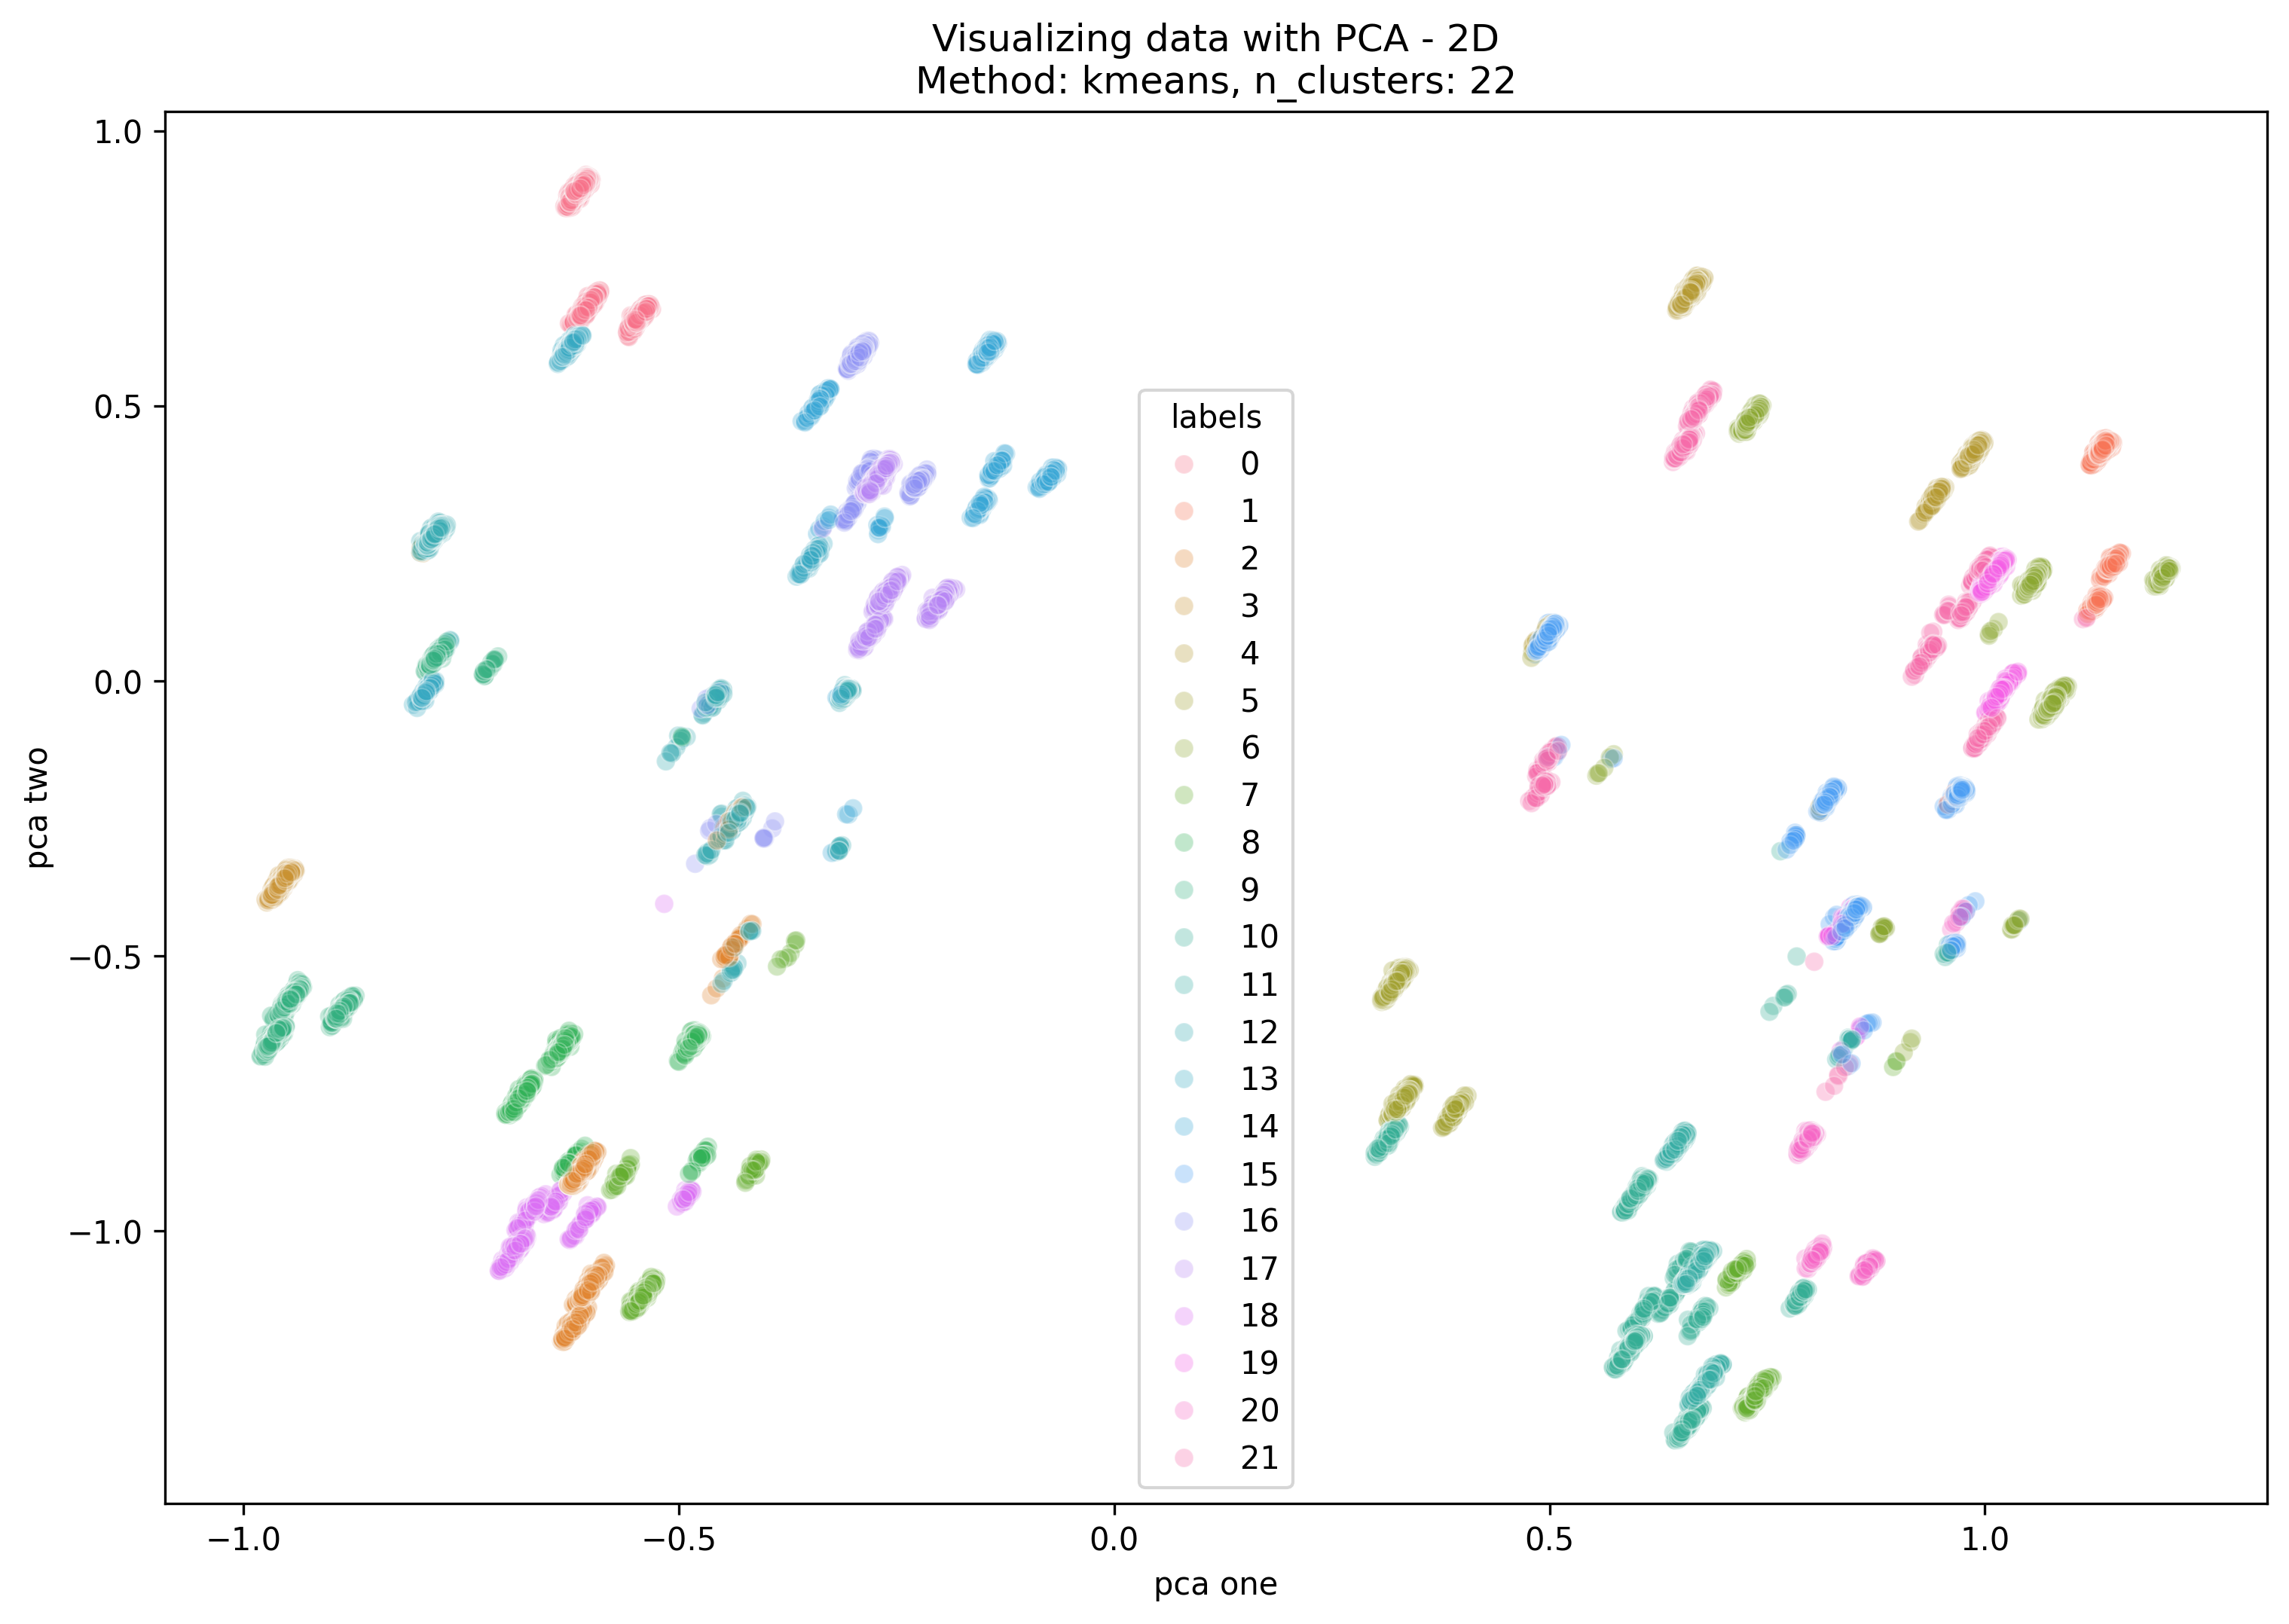

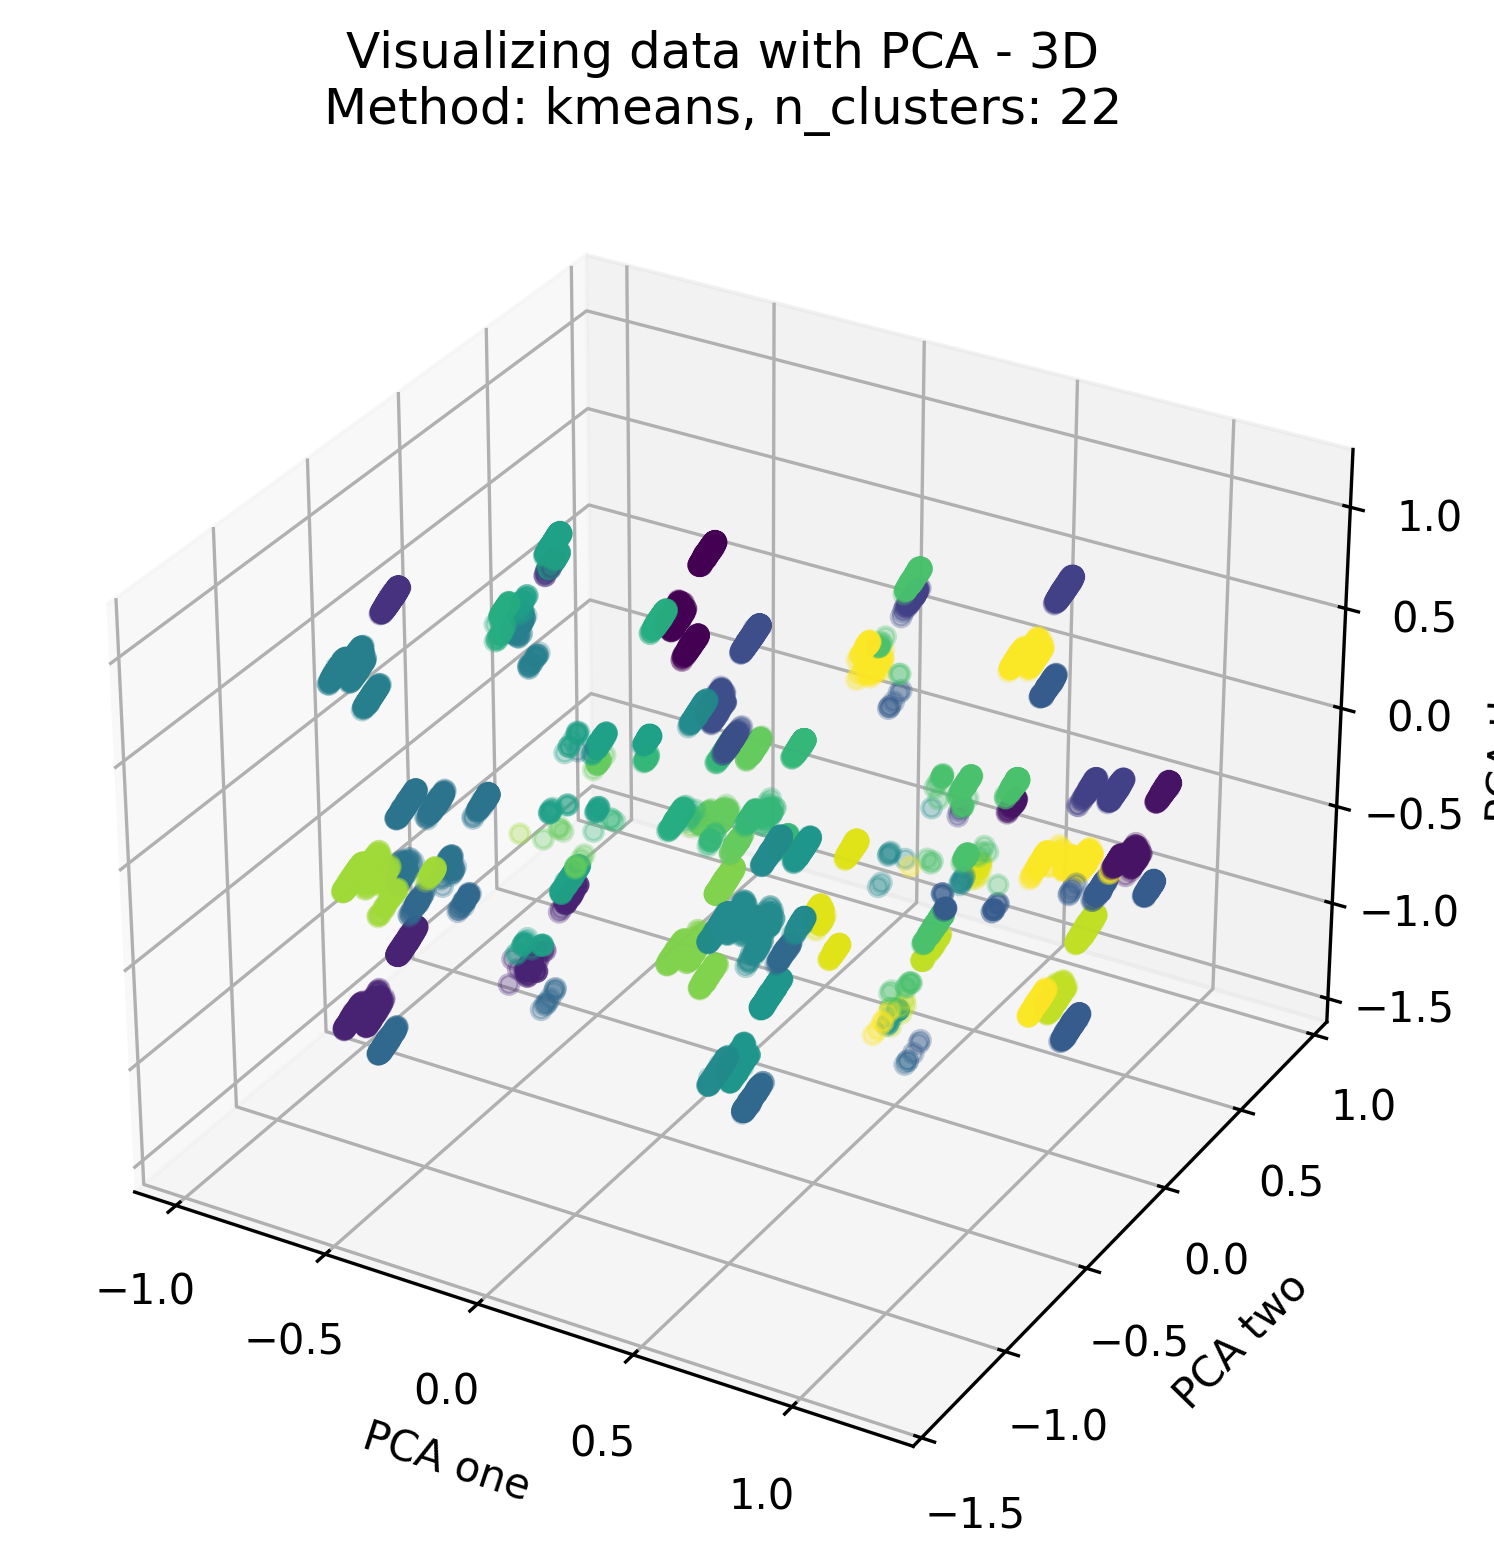

In [ ]:
plt.figure(figsize=(12,8), dpi=300)

sns.scatterplot(
    x="pca one", y="pca two",
    data=df_pca,
    hue="labels",
    alpha=0.3,
    palette= sns.color_palette("husl", n_colors=df_pca.labels.nunique())
)

plt.title(f"Visualizing data with PCA - 2D\nMethod: kmeans, n_clusters: 22")
plt.savefig(f"PCA_no_impute_one_hot_kmeans_22.jpeg")

fig = plt.figure(figsize=(8, 6), dpi=300)
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_pca["pca one"], df_pca["pca two"], df_pca["pca three"], c =df_pca['labels'], alpha=0.3)
ax.set_xlabel("PCA one")
ax.set_ylabel("PCA two")
ax.set_zlabel("PCA three")
plt.title(f"Visualizing data with PCA - 3D\nMethod: kmeans, n_clusters: 22")
# plt.savefig(f"PCA3D_no_impute_one_hot_kmeans_22.jpeg")